In [2]:
import pandas as pd
import numpy as np
#visuals
import matplotlib.pyplot as plt
import seaborn as sns
#db
import psycopg2 as psy
#for decoding the IP's location
import geoip2.database


In [3]:
merged_df = pd.read_csv('/Users/sa12/Documents/Repositories/The-CyberChase/DATA/feb5-12_merged.csv')

In [11]:
reader = geoip2.database.Reader('/Users/sa12/Documents/Repositories/The-CyberChase/DATA/GeoLite2-City.mmdb')
# Build location info
locations = []

for ip in merged_df['Src IP']:
    try:
        response = reader.city(ip)
        country = response.country.name or "Unknown Country"
        city = response.city.name or "Unknown City"

        location_str = f"{country}"
    except Exception as e:
        location_str = f"Error: {e}"

    locations.append(location_str)

# Add to DataFrame
merged_df['Location'] = locations

In [12]:
merged_df['Label Code'] = merged_df['Label'].map({'ddospot':1,'cowrie':2,'adbhoney':3,'log4pot':4,'ciscoasa':5,'elasticpot':6,'mailoney':7})
# Convert to datetime
times = pd.to_datetime(merged_df['Timestamp'])
# Extract time and convert to float (hours)
merged_df['float_time'] = times.dt.hour + times.dt.minute / 60 + times.dt.second / 3600
#convert IPs into ints
merged_df['Src #'] = merged_df['Src IP'].str.replace('.', '', regex=False).astype(int)
merged_df['Dst #'] = merged_df['Dst IP'].str.replace('.', '', regex=False).astype(int)
#create frame
merged_df_misc = merged_df[['Src #',
'Src Port',
'Dst #',
'Dst Port',
'Protocol',
'float_time',
'Label Code']]

<Axes: xlabel='float_time', ylabel='Count'>

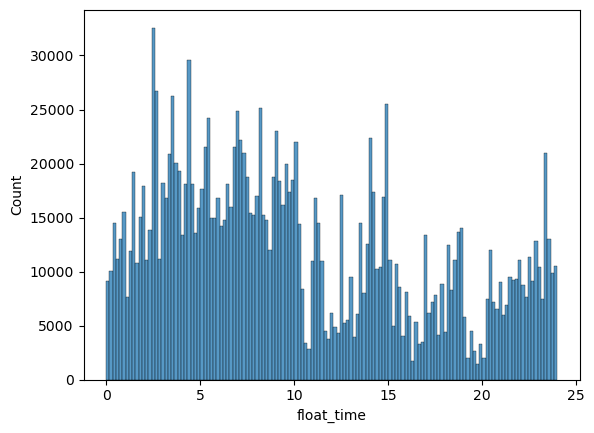

In [19]:
counts = merged_df['float_time'].value_counts().to_frame()
sns.histplot(merged_df['float_time'])

In [42]:
# Group by the three columns and count the number of rows in each group
grouped_counts = merged_df.groupby(['Timestamp', 'Src #']).size().reset_index(name='Count')

# Display the result
grouped_counts.describe()

,Src #,Count
count,5.799620e+05,579962.000000
mean,2.381660e+10,2.998843
std,4.652972e+10,5.540170
min,5.710000e+02,1.000000
25%,7.967152e+08,1.000000
50%,3.713762e+09,1.000000
75%,1.882089e+10,3.000000
max,2.232522e+11,898.000000


In [20]:
merged_df['Timestamp']

0          2023-02-05 23:02:50
1          2023-02-05 23:02:50
2          2023-02-05 23:02:50
3          2023-02-05 23:02:50
4          2023-02-05 23:02:50
                  ...         
1739210    2023-02-12 23:21:05
1739211    2023-02-12 23:21:05
1739212    2023-02-12 23:21:05
1739213    2023-02-12 23:21:05
1739214    2023-02-12 23:21:05
Name: Timestamp, Length: 1739215, dtype: object

In [18]:
counts

,count
float_time,
13.516389,948
15.366111,833
13.462500,770
15.610833,672
15.885556,588
...,...
19.114722,1
19.112778,1
19.112222,1


<Axes: >

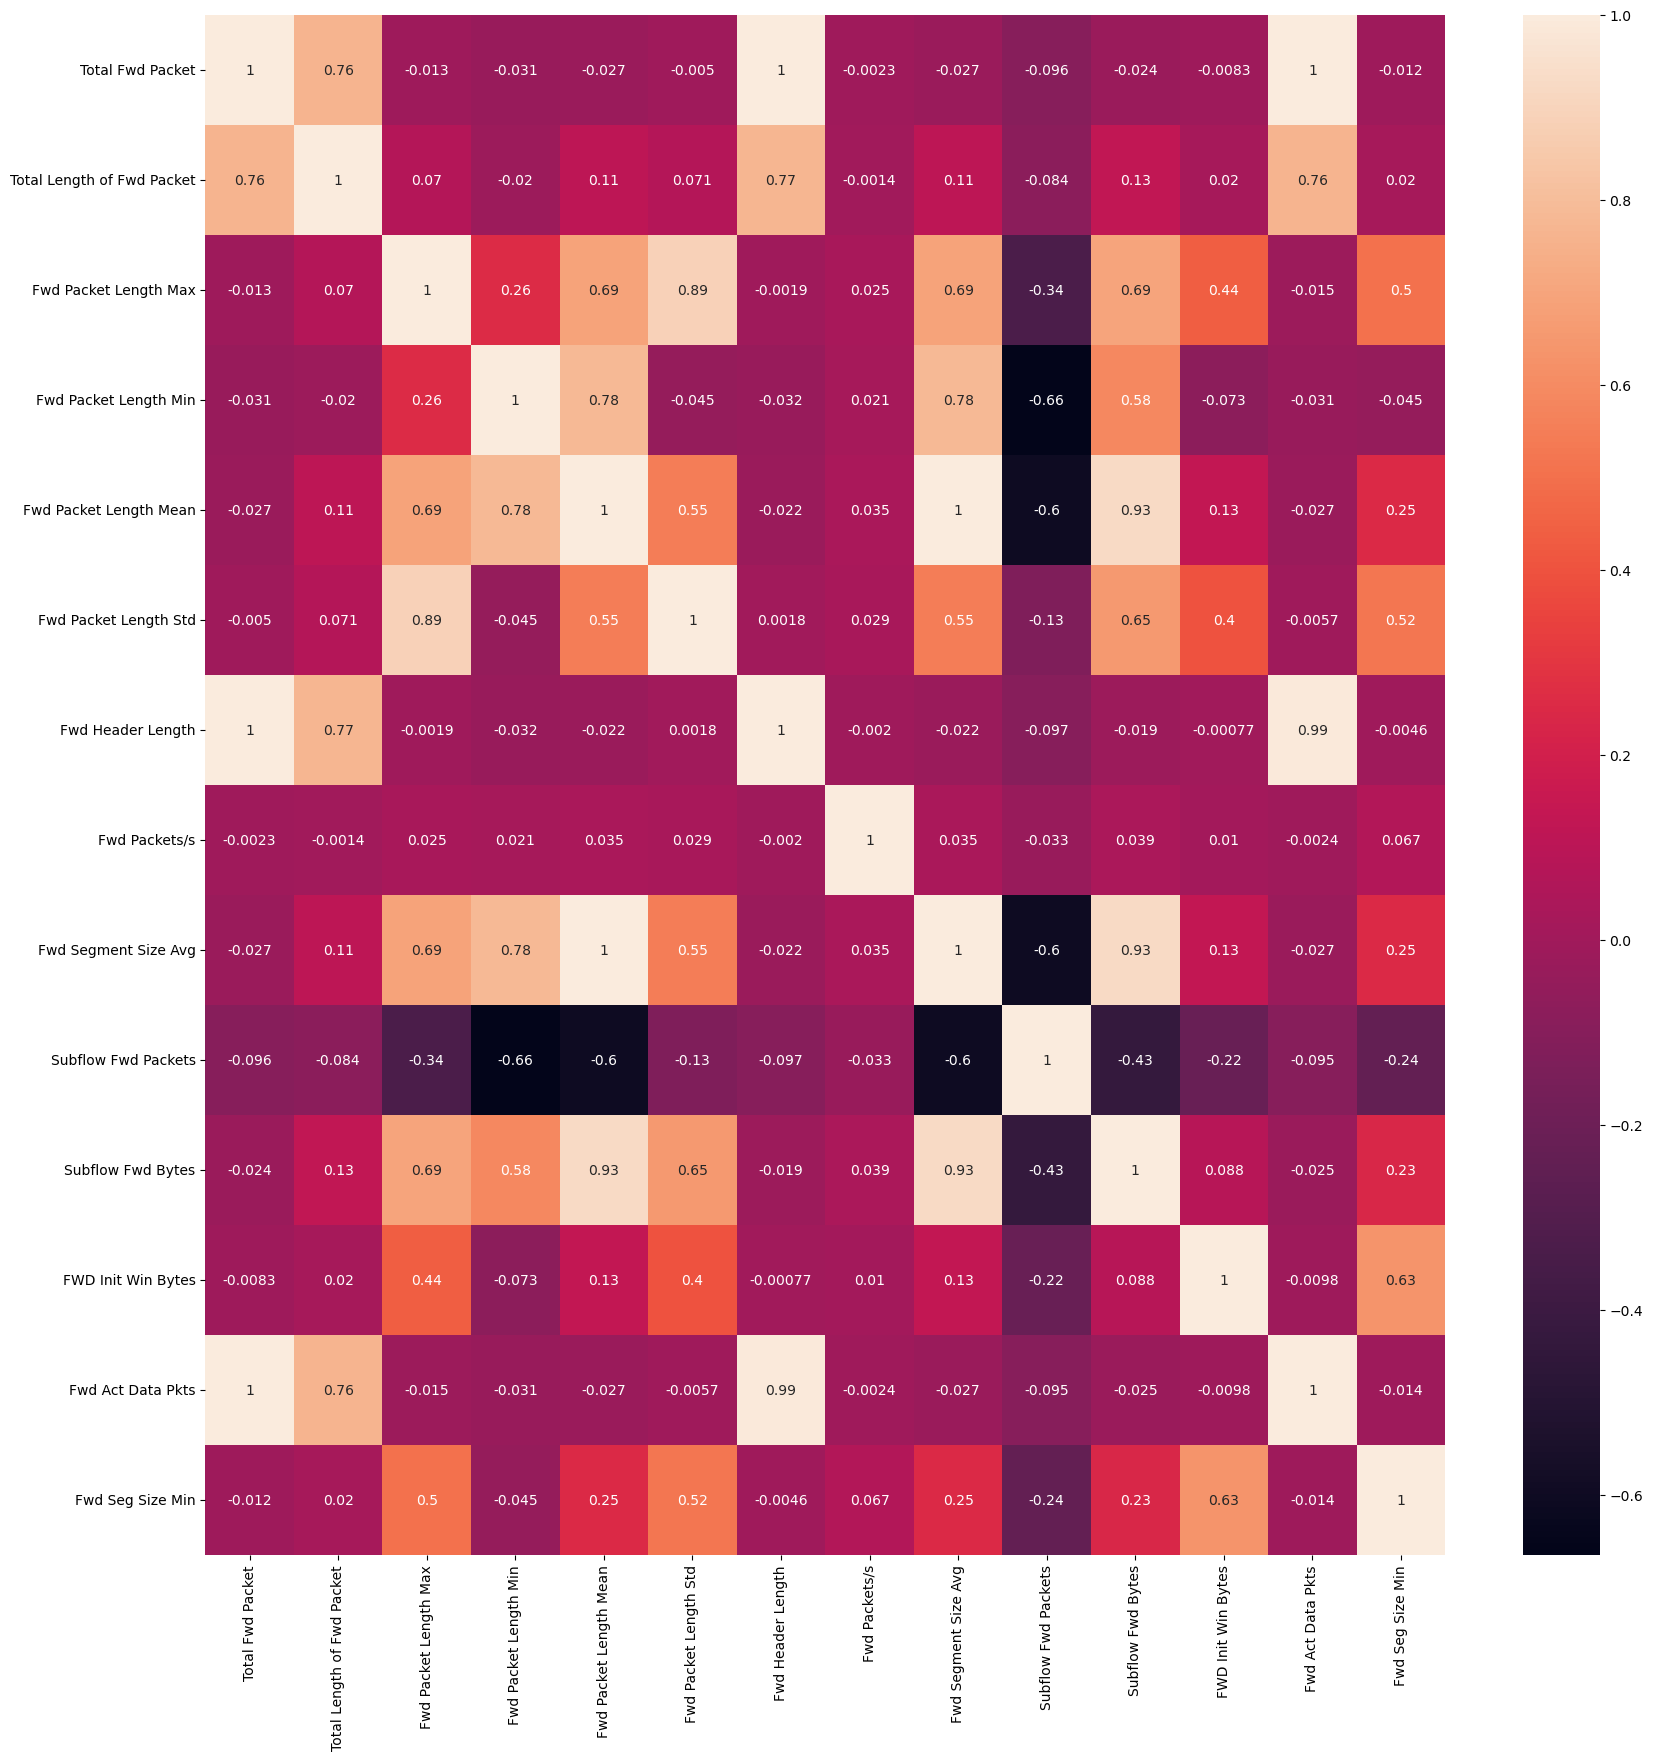

In [24]:
merged_Fwd = merged_df[['Total Fwd Packet',
                'Total Length of Fwd Packet',
                'Fwd Packet Length Max', 
                'Fwd Packet Length Min', 
                'Fwd Packet Length Mean', 
                'Fwd Packet Length Std',  
                'Fwd Header Length', 
                'Fwd Packets/s', 
                'Fwd Segment Size Avg', 
                'Subflow Fwd Packets', 
                'Subflow Fwd Bytes', 
                'FWD Init Win Bytes', 
                'Fwd Act Data Pkts', 
                'Fwd Seg Size Min']]
plt.figure(figsize=(20,20))
sns.heatmap(merged_Fwd.corr(), annot=True)

In [ ]:
merged_Bwd = merged_df[['Total Bwd packets', 
      'Total Length of Bwd Packet', 
      'Bwd Packet Length Max', 
      'Bwd Packet Length Min', 
      'Bwd Packet Length Mean', 
      'Bwd Packet Length Std',   
      'Bwd Header Length',
      'Bwd Packets/s', 
      'Bwd Segment Size Avg', 
      'Bwd Bytes/Bulk Avg', 
      'Bwd Packet/Bulk Avg', 
      'Bwd Bulk Rate Avg', 
      'Subflow Bwd Bytes', 
      'Bwd Init Win Bytes']]


<Axes: >

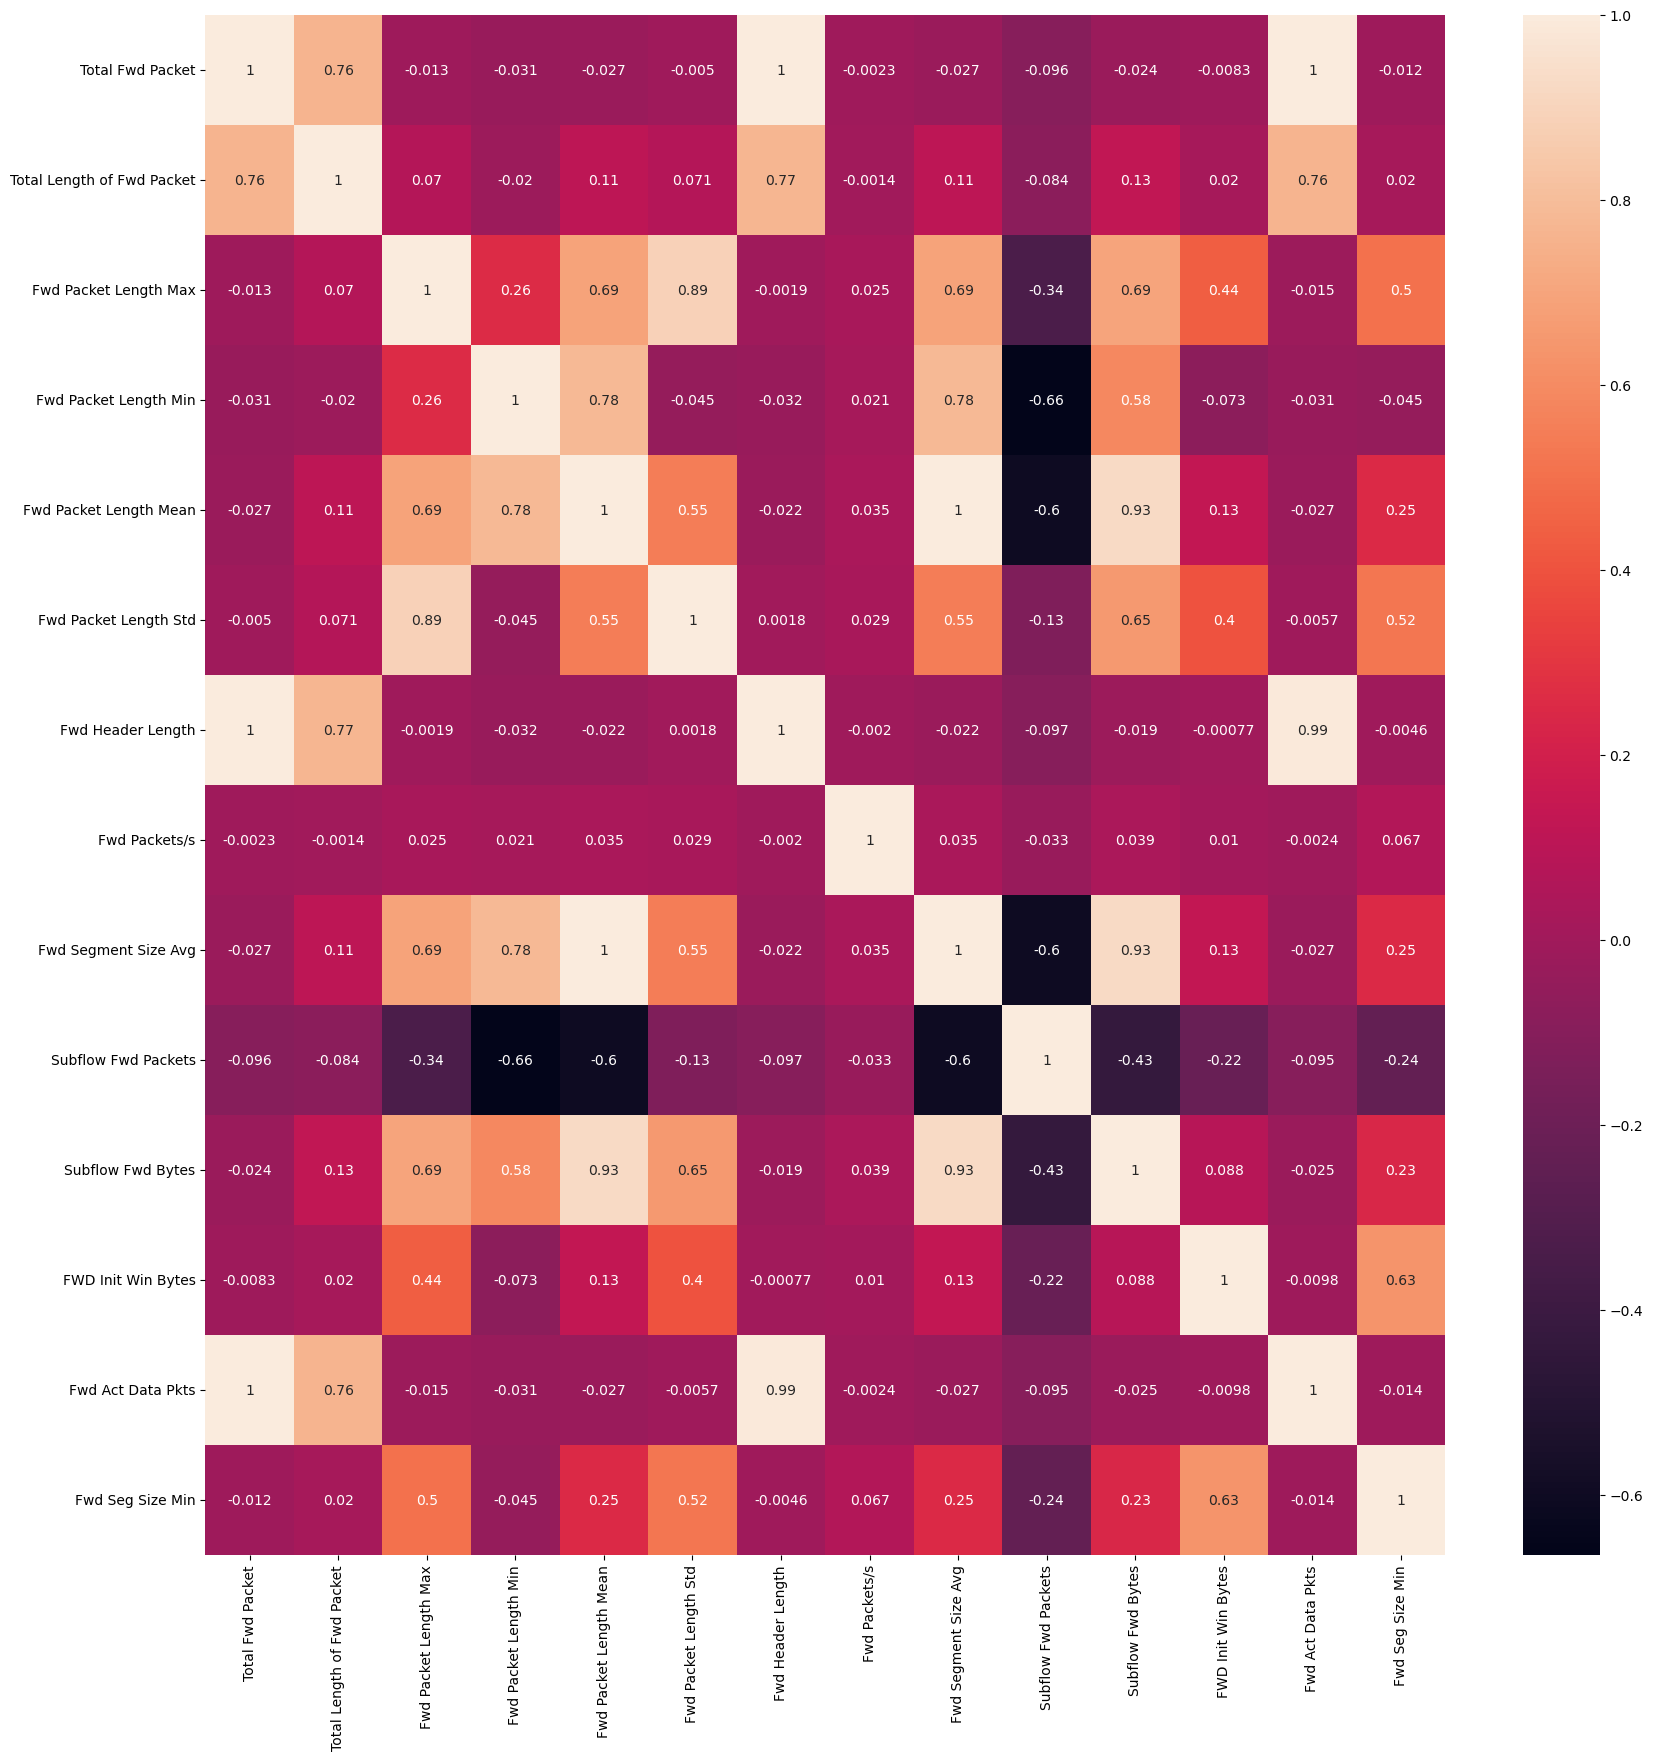

In [54]:
merged_Fwd = merged_df[['Total Fwd Packet',
                'Total Length of Fwd Packet',
                'Fwd Packet Length Max', 
                'Fwd Packet Length Min', 
                'Fwd Packet Length Mean', 
                'Fwd Packet Length Std',  
                'Fwd Header Length', 
                'Fwd Packets/s', 
                'Fwd Segment Size Avg', 
                'Subflow Fwd Packets', 
                'Subflow Fwd Bytes', 
                'FWD Init Win Bytes', 
                'Fwd Act Data Pkts', 
                'Fwd Seg Size Min']]
plt.figure(figsize=(20,20))
sns.heatmap(merged_Fwd.corr(),annot=True)

<Axes: xlabel='Total Length of Fwd Packet', ylabel='Fwd Packet Length Mean'>

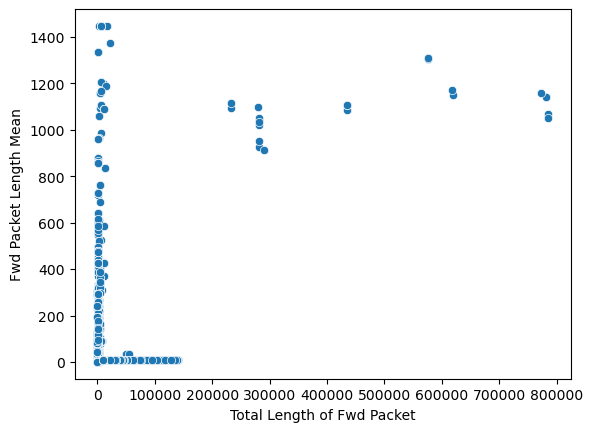

In [56]:
sns.scatterplot(merged_df, x = 'Total Length of Fwd Packet', y = 'Fwd Packet Length Mean')

In [57]:
merged_df['Total Length of Fwd Packet'].value_counts()

Total Length of Fwd Packet
16.0       1225182
48.0        212041
24.0        105086
0.0          19583
32.0         15779
            ...   
39128.0          1
38864.0          1
38760.0          1
38496.0          1
22040.0          1
Name: count, Length: 4983, dtype: int64

<Axes: >

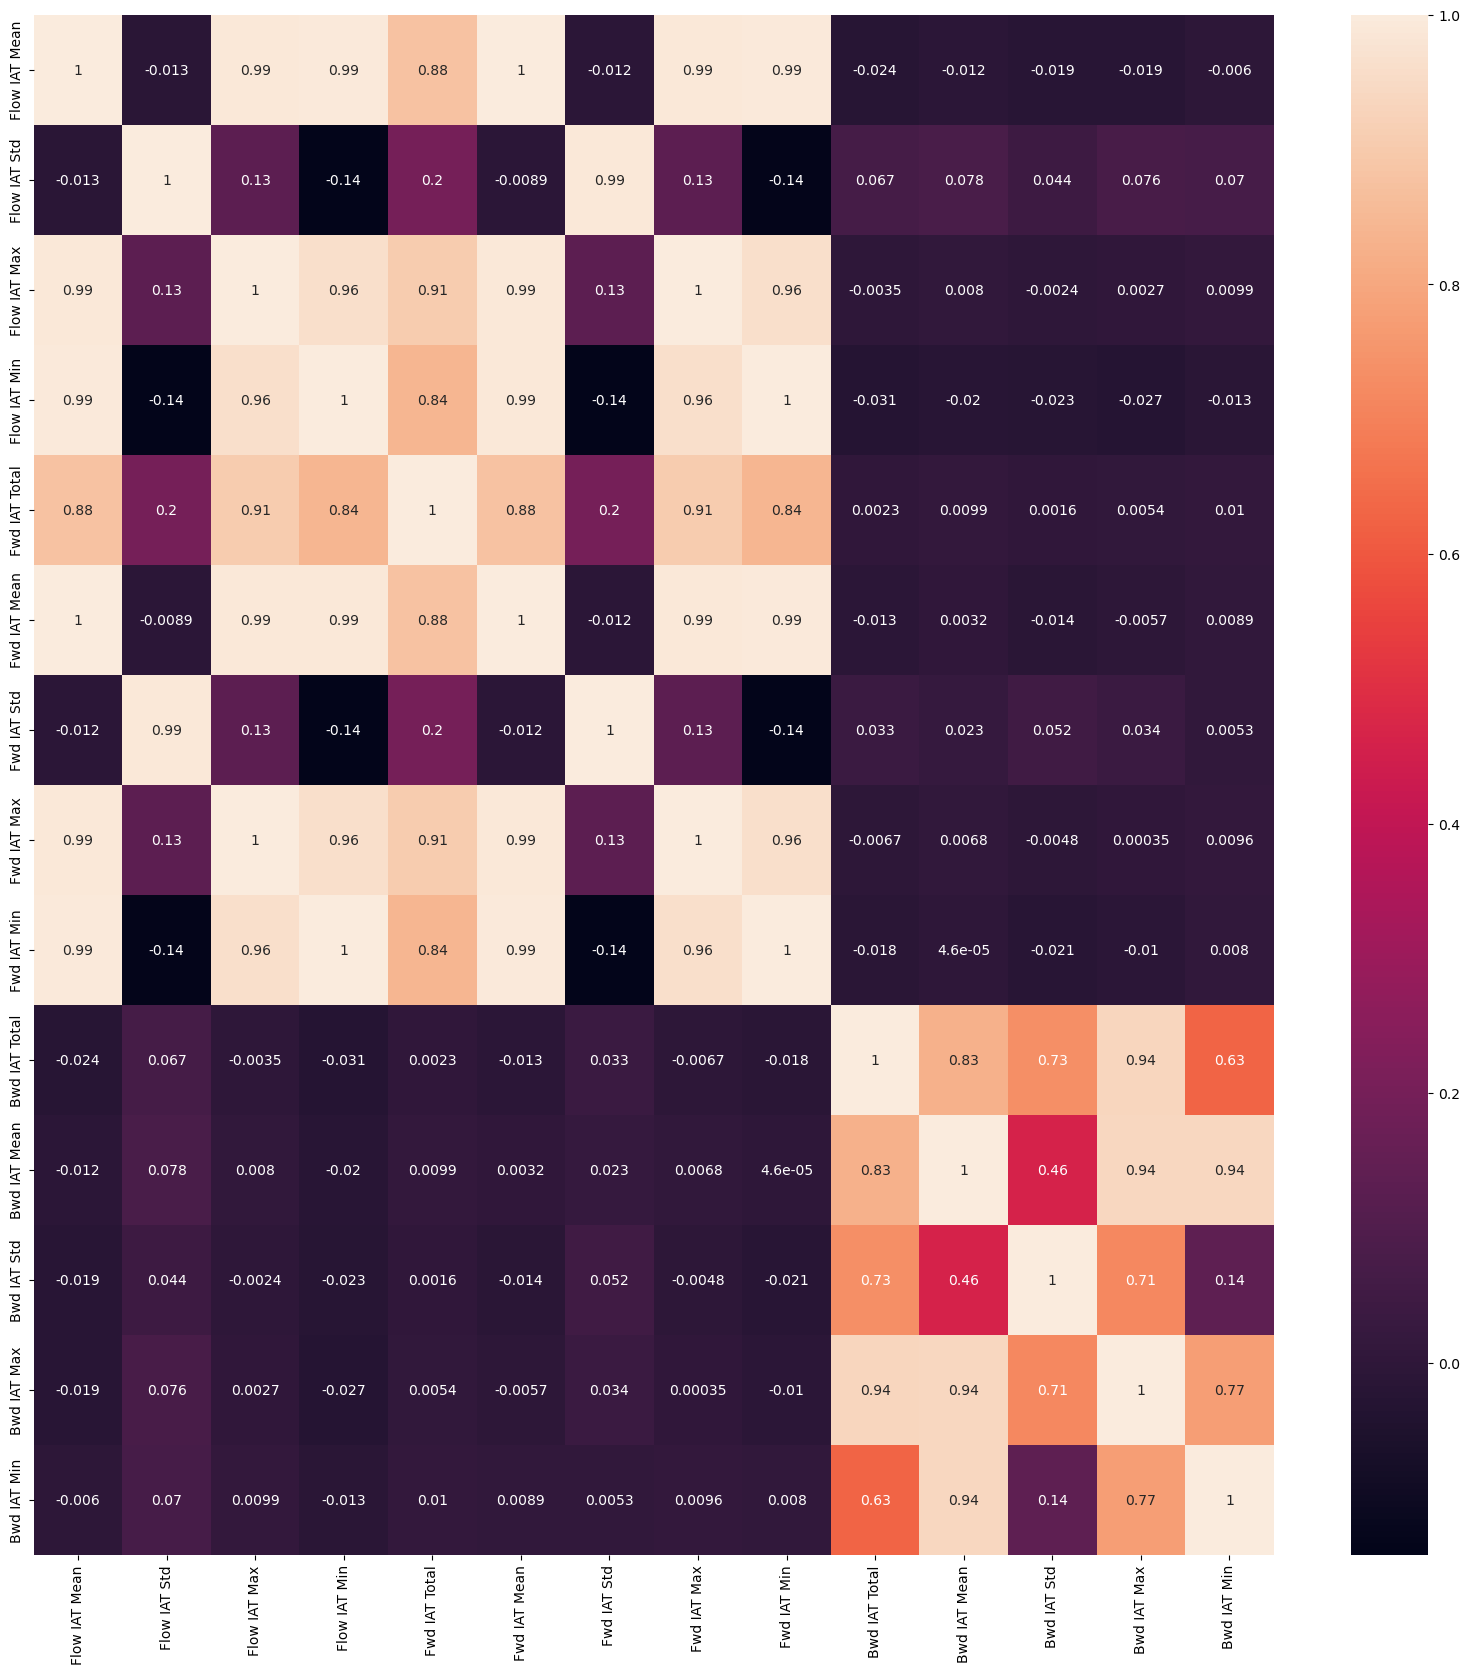

In [46]:
merged_IAT = merged_df[['Flow IAT Mean', 
                 'Flow IAT Std', 
                 'Flow IAT Max', 
                 'Flow IAT Min', 
                 'Fwd IAT Total', 
                 'Fwd IAT Mean', 
                 'Fwd IAT Std', 
                 'Fwd IAT Max', 
                 'Fwd IAT Min', 
                 'Bwd IAT Total', 
                 'Bwd IAT Mean', 
                 'Bwd IAT Std',
                 'Bwd IAT Max', 
                 'Bwd IAT Min']]
plt.figure(figsize=(20,20))
sns.heatmap(merged_IAT.corr(),annot=True)

In [90]:
merged_df['PSH Flag Count'].value_counts()

PSH Flag Count
0      1724740
2         4875
1         2782
12        1415
7         1309
        ...   
167          1
165          1
540          1
538          1
68           1
Name: count, Length: 94, dtype: int64

In [29]:
DDoS = merged_df[merged_df['Label Code'] == 1]
not_DDoS = merged_df[merged_df['Label Code'] != 1]


In [66]:
DDoS.groupby('Label')['Total Length of Fwd Packet'].value_counts()

Label    Total Length of Fwd Packet
ddospot  16.0                          1225040
         48.0                           212008
         24.0                           104301
         32.0                            15776
         8.0                             13281
                                        ...   
         139656.0                            1
         139776.0                            1
         140024.0                            1
         140416.0                            1
         141064.0                            1
Name: count, Length: 4354, dtype: int64

In [52]:
DDoS['Flow IAT Std'].value_counts()

Flow IAT Std
0.000000e+00    1429090
2.687006e+02         52
2.771859e+02         51
2.538513e+02         47
5.077027e+02         44
                 ...   
4.559020e+07          1
1.546923e+07          1
4.757332e+06          1
1.711936e+07          1
1.711859e+03          1
Name: count, Length: 263743, dtype: int64

In [53]:
not_DDoS['Flow IAT Std'].value_counts()

Flow IAT Std
0.000000e+00    13874
7.071068e-01       26
7.424621e+01       12
4.030509e+01       11
7.990307e+01       10
                ...  
1.096936e+05        1
2.360968e+05        1
1.018269e+05        1
1.643516e+06        1
2.674169e+02        1
Name: count, Length: 19140, dtype: int64

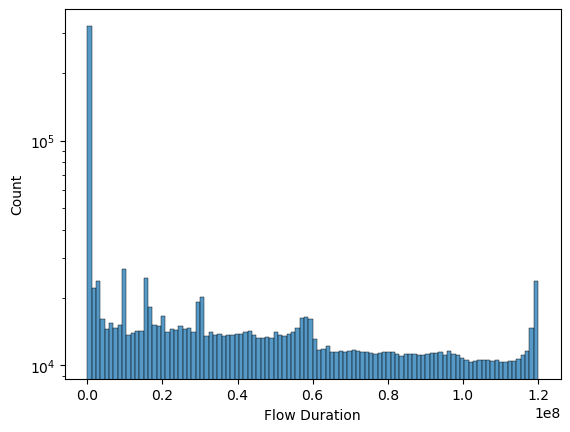

In [33]:
sns.histplot(DDoS['Flow Duration'])
plt.yscale('log')

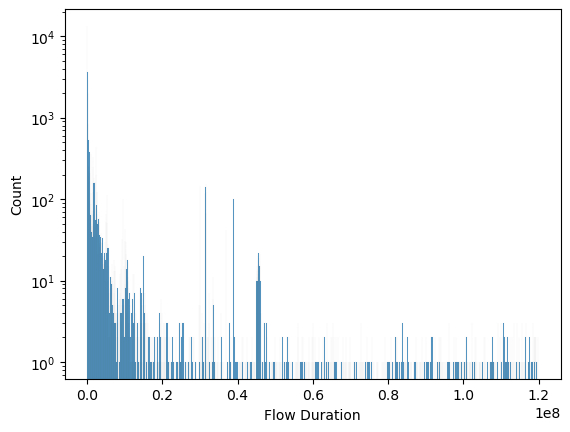

In [34]:
sns.scatterplot(not_DDoS, x ='Flow Duration', y = '')

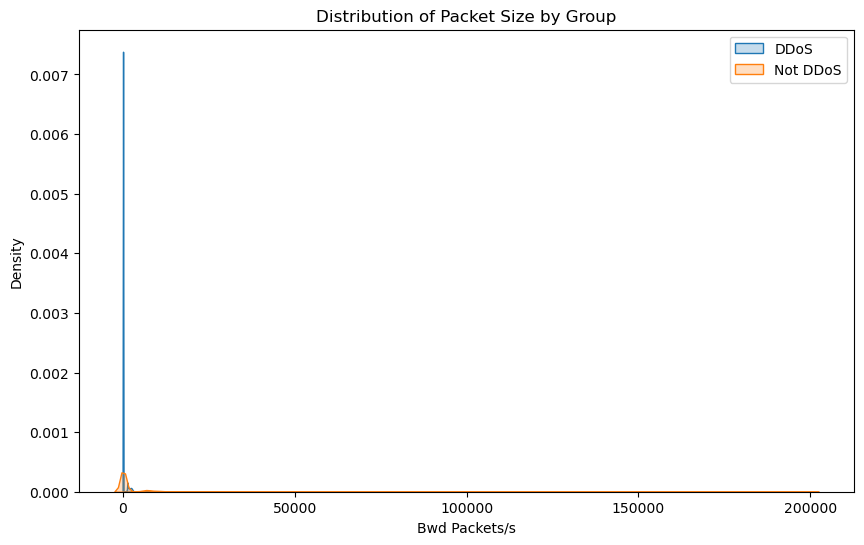

In [38]:
plt.figure(figsize=(10, 6))
sns.kdeplot(DDoS['Bwd Packets/s'], label='DDoS', fill=True)
sns.kdeplot(not_DDoS['Bwd Packets/s'], label='Not DDoS', fill=True)
plt.title('Distribution of Packet Size by Group')
plt.legend()
plt.show()

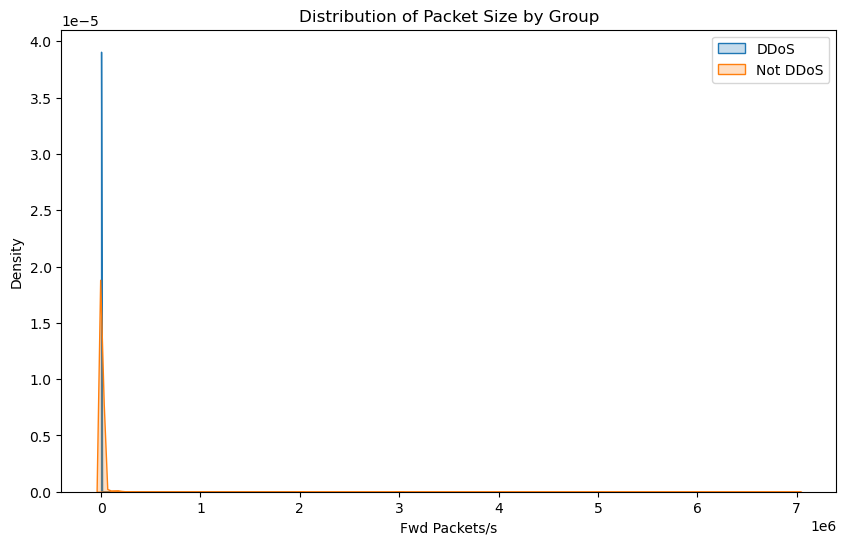

In [39]:
plt.figure(figsize=(10, 6))
sns.kdeplot(DDoS['Fwd Packets/s'], label='DDoS', fill=True)
sns.kdeplot(not_DDoS['Fwd Packets/s'], label='Not DDoS', fill=True)
plt.title('Distribution of Packet Size by Group')
plt.legend()
plt.show()

/var/folders/t3/tq1z8cy535bck4xjwkvc0_xh0000gn/T/ipykernel_82538/2899184473.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(DDoS['PSH Flag Count'], label='DDoS', fill=True)


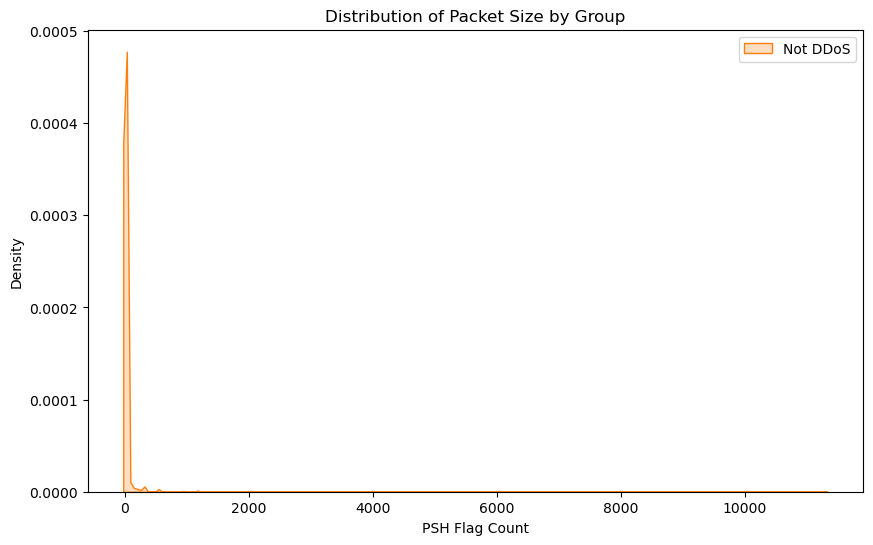

In [45]:
plt.figure(figsize=(10, 6))
sns.kdeplot(DDoS['PSH Flag Count'], label='DDoS', fill=True)
sns.kdeplot(not_DDoS['PSH Flag Count'], label='Not DDoS', fill=True)
plt.title('Distribution of Packet Size by Group')
plt.legend()
plt.show()

KeyboardInterrupt: 

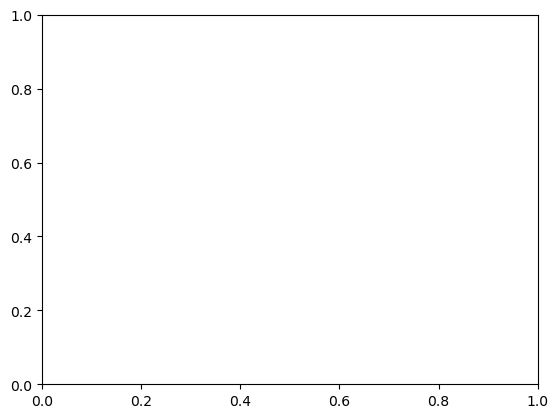

In [44]:
sns.lineplot(merged_df, x='Flow Duration', y='Flow IAT Mean')

<Axes: xlabel='Dst Port', ylabel='Protocol'>

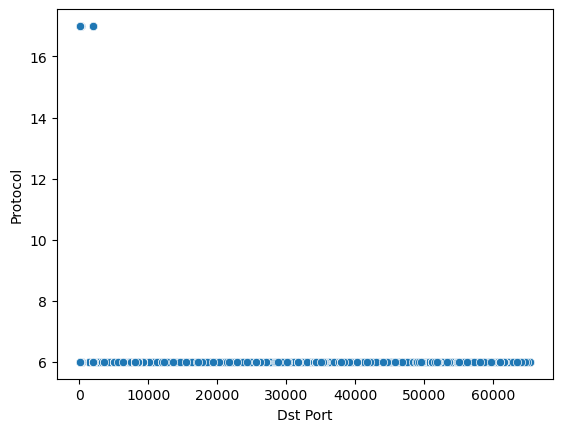

In [4]:
sns.scatterplot(merged_df, x='Dst Port', y='Protocol')

In [88]:
import plotly.express as px
# First, group by country
country_counts = merged_df['Location'].value_counts().reset_index()
country_counts.columns = ['Location', 'Count']
country_counts['LogCount'] = np.log(country_counts['Count'])
fig = px.choropleth(
    country_counts,
    locations="Location",
    locationmode="country names",
    color="LogCount",
    color_continuous_scale="temps",
    #labels={'LogCount':['No Intrusions', 'Low Intrusions', 'Medium Intrusions', 'High Intrusions']}
    title="Global Map of Intrusion Attempts",
    hover_name="Location",
    hover_data={"Count": True, "LogCount": False}
)
fig.show()

In [95]:
merged_df['Idle Max'].value_counts()

Idle Max
1.676196e+15    7
1.675949e+15    6
1.676068e+15    6
1.675701e+15    6
1.675655e+15    5
               ..
1.675760e+15    1
1.675760e+15    1
1.675760e+15    1
1.675760e+15    1
1.676244e+15    1
Name: count, Length: 1731459, dtype: int64

In [81]:
DDoS['Flow Packets/s'].value_counts()

Flow Packets/s
2604.166667    625
4784.688995    623
4807.692308    616
4987.531172    616
4878.048780    613
              ... 
0.126903         1
0.113503         1
0.079410         1
2.463503         1
33.085326        1
Name: count, Length: 1479403, dtype: int64

In [98]:
DDoS['Fwd Packets/s'].value_counts()

Fwd Packets/s
2392.344498    653
1302.083333    645
2493.765586    629
2403.846154    624
2469.135802    619
              ... 
0.153279         1
0.084323         1
0.064389         1
0.069915         1
33.085326        1
Name: count, Length: 1478582, dtype: int64

In [97]:
DDoS['Bwd Packets/s'].value_counts()

Bwd Packets/s
0.000000       1456598
2392.344498        650
2493.765586        644
2403.846154        637
2469.135802        631
                ...   
0.134001             1
0.133273             1
0.133299             1
0.133261             1
510.986203           1
Name: count, Length: 32476, dtype: int64

In [82]:
flow = pd.qcut(DDoS['Flow Packets/s'],3, precision=3)
flow

/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning:

invalid value encountered in subtract



ValueError: missing values must be missing in the same location both left and right sides

In [76]:
not_DDoS['Flow Packets/s'].value_counts()

Flow Packets/s
inf             793
2.040816e+04     88
1.538462e+05     87
1.360544e+04     85
2.083333e+04     79
               ... 
2.766481e+01      1
9.004036e+00      1
1.425517e+03      1
1.274765e+01      1
2.813705e+01      1
Name: count, Length: 24754, dtype: int64

In [ ]:
sns.lineplot(merged_df, x='Flow Duration', y='Flow IAT Max')
sns.lineplot(merged_df, x='Flow Duration', y='Flow IAT Min')
sns.lineplot(merged_df, x='Flow Duration', y='Flow IAT Std')


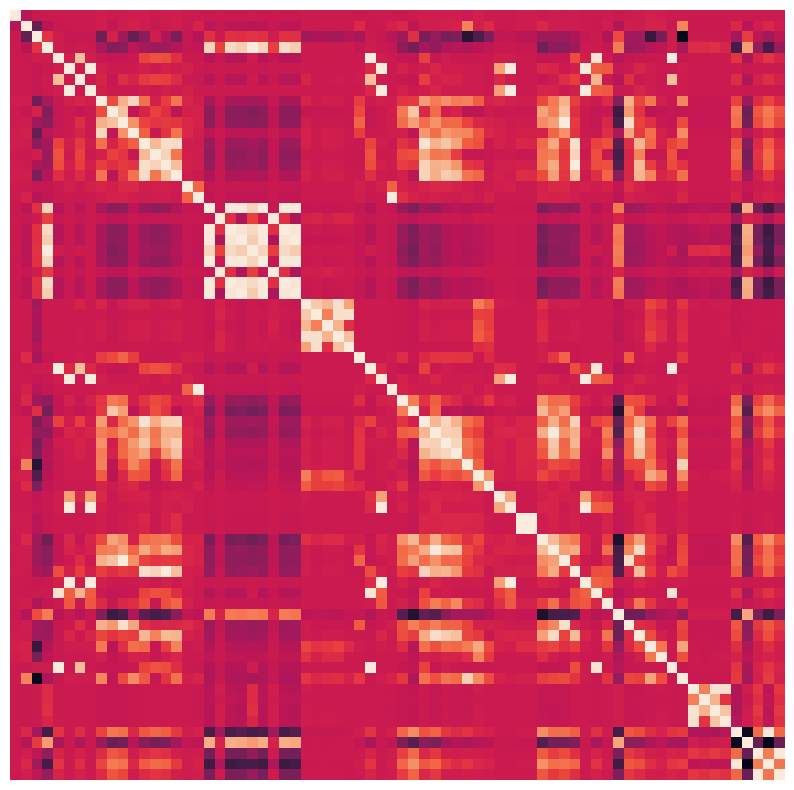

In [11]:

merged_df = merged_df.loc[:, (merged_df != 0).any(axis=0)]
# Generate correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(merged_df.corr(numeric_only=True), cbar=False)

# Remove axis tick labels (column and row names)
plt.xticks([], [])
plt.yticks([], [])

plt.xlabel('')
plt.ylabel('')
plt.title('')  # Optional: Remove the title too
plt.show()